In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader as web
import datetime

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
start = datetime.datetime(pd.datetime.now().year-1,pd.datetime.now().month,pd.datetime.now().day)
end = datetime.datetime(pd.datetime.now().year,pd.datetime.now().month,pd.datetime.now().day)

In [17]:
script = input("Please Enter the stock name to be analyzed:")

Please Enter the stock name to be analyzed:INFY


In [18]:
stock = web.DataReader(script,'yahoo',start,end)

In [19]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-21,11.08,10.94,10.94,11.06,5108000.0,10.774081
2019-03-22,11.12,10.86,11.05,10.88,8525300.0,10.598734
2019-03-25,10.88,10.77,10.86,10.82,7322400.0,10.540285
2019-03-26,10.88,10.77,10.86,10.82,4427200.0,10.540285
2019-03-27,10.83,10.67,10.79,10.73,5644900.0,10.452611


***********************************************************************************************************************
Price fluctuation over the last one year from 2019-03-22 00:00:00 to 2020-03-22 00:00:00
***********************************************************************************************************************


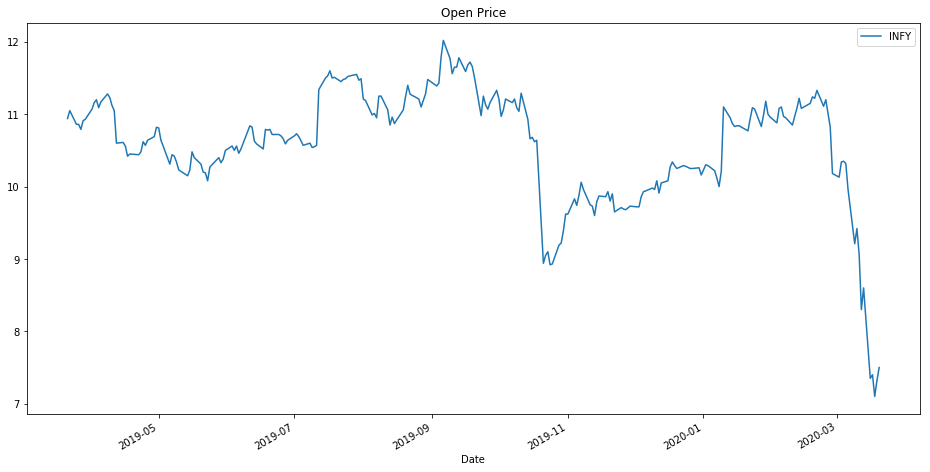

In [20]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Price fluctuation over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Open'].plot(label='{}'.format(script),figsize=(16,8),title='Open Price')
plt.legend()
plt.show();

***********************************************************************************************************************
Total volume traded over the last one year from 2019-03-22 00:00:00 to 2020-03-22 00:00:00
***********************************************************************************************************************


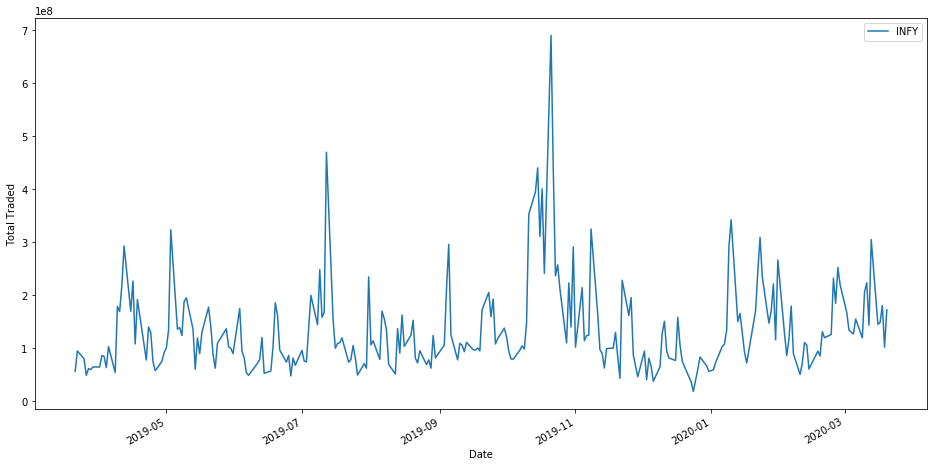

In [21]:
stock['Total Traded'] = stock['Open']*stock['Volume']

print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Total volume traded over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Total Traded'].plot(label='{}'.format(script),figsize=(16,8))
plt.ylabel('Total Traded')
plt.legend()
plt.show();

In [22]:
stock['Total Traded'].idxmax()


Timestamp('2019-10-21 00:00:00')

In [23]:
stock['Total Traded'].max()

689858643.6201096

***********************************************************************************************************************
MA50 and MA200 over the last one year from 2019-03-22 00:00:00 to 2020-03-22 00:00:00
***********************************************************************************************************************


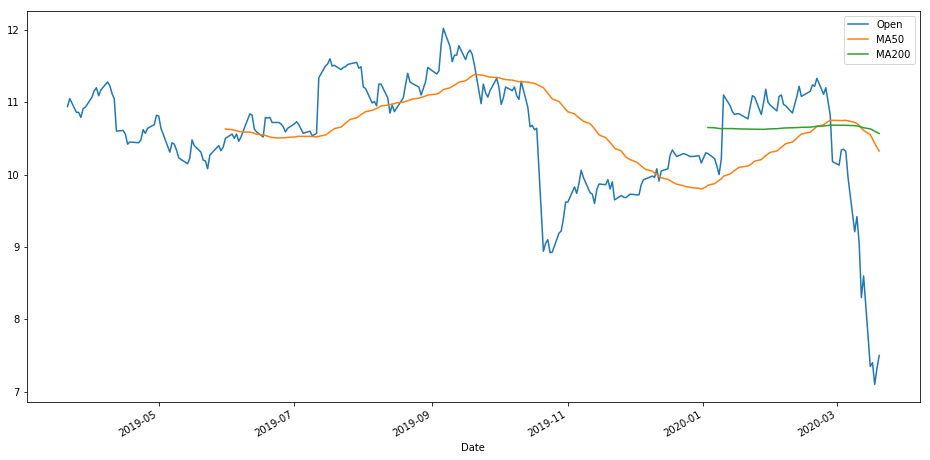

In [24]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'MA50 and MA200 over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['MA50'] = stock['Open'].rolling(50).mean()
stock['MA200'] = stock['Open'].rolling(200).mean()
stock[['Open','MA50','MA200']].plot(label='{}'.format(script),figsize=(16,8))
plt.show();

***********************************************************************************************************************
Candelistic Chart  over the last 2 months
***********************************************************************************************************************


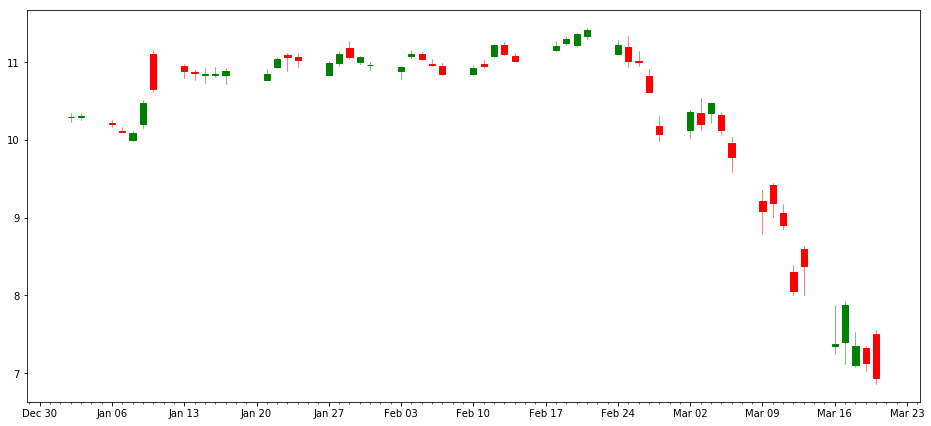

In [25]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
stock_reset = stock.loc['2020-01':'2020-03'].reset_index()
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Candelistic Chart  over the last 2 months')
print ('***********************************************************************************************************************')

# Create a new column of numerical "date" values for matplotlib to use
stock_reset['date_ax'] = stock_reset['Date'].apply(lambda date: date2num(date))
stock_values = [tuple(vals) for vals in stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, stock_values, width=0.6, colorup='g',colordown='r')
plt.show();


***********************************************************************************************************************
Percentage change of the stock  over the last one year from 2019-03-22 00:00:00 to 2020-03-22 00:00:00 😀
***********************************************************************************************************************


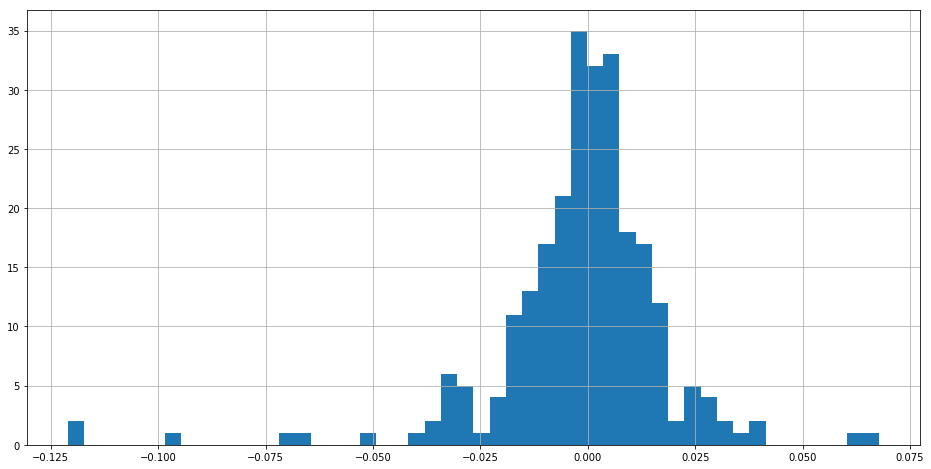

In [26]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Percentage change of the stock  over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')

#stock['returns'] = (stock['Close'] / stock['Close'].shift(1) ) - 1
stock['returns'] = stock['Close'].pct_change(1)
stock['returns'].hist(bins=50,figsize=(16,8))
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last one year from 2019-03-22 00:00:00 to 2020-03-22 00:00:00 😀
***********************************************************************************************************************


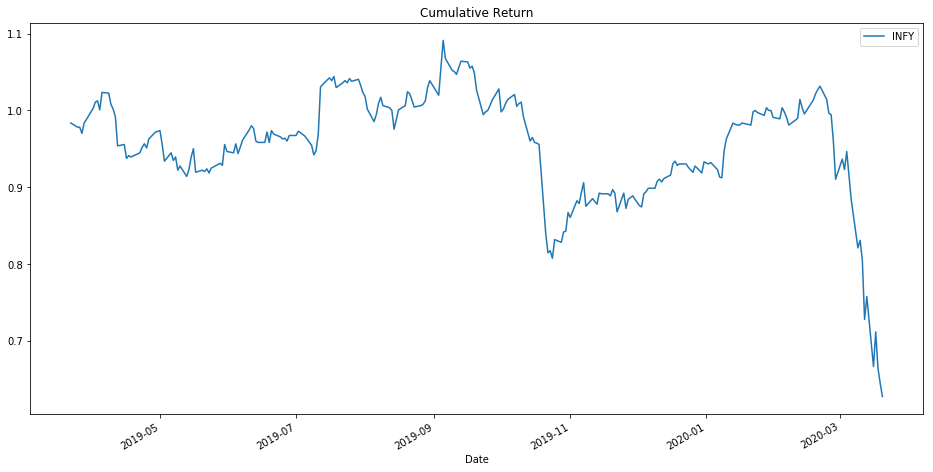

In [27]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].plot(label='{}'.format(script),figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last Three Months 😀
***********************************************************************************************************************


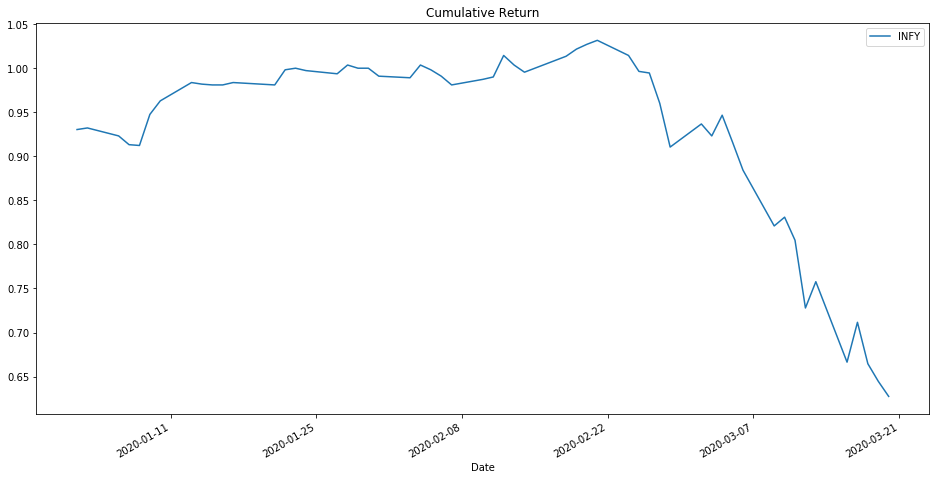

In [28]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last Three Months \N{grinning face}')
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].loc['2020-01':'2020-03'].plot(label='{}'.format(script),figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()